In [10]:
import sys
!{sys.executable} -m pip install pytrends
import pandas as pd

You are using pip version 9.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [11]:
from platform import python_version
print(python_version())

3.5.2


In [12]:
# Use pytrends API - https://github.com/GeneralMills/pytrends#interest-over-time
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360)

In [13]:
# Get last 5 years and forward fill as we get data with the average popularity over every 7 days
kw_list = ["bitcoin"]
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')

block_data_5_years = pytrends.interest_over_time()

In [14]:
block_data_5_years.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 261 entries, 2014-05-18 to 2019-05-12
Data columns (total 2 columns):
bitcoin      261 non-null int64
isPartial    261 non-null object
dtypes: int64(1), object(1)
memory usage: 6.1+ KB


In [15]:
block_data_5_years = block_data_5_years.reset_index()
block_data_5_years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 3 columns):
date         261 non-null datetime64[ns]
bitcoin      261 non-null int64
isPartial    261 non-null object
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 6.2+ KB


In [24]:
block_data_5_years.head()

,date,bitcoin,isPartial
0,2014-05-18,2,False
1,2014-05-25,3,False
2,2014-06-01,3,False
3,2014-06-08,3,False
4,2014-06-15,3,False


In [16]:
# Forward fill missing dates
r = pd.date_range(start=block_data_5_years.date.min(), end=block_data_5_years.date.max())
block_data_5_years_complete = block_data_5_years.set_index('date').reindex(r).fillna(method='ffill').rename_axis('date')
block_data_5_years_complete.head()


,bitcoin,isPartial
date,,
2014-05-18,2.0,False
2014-05-19,2.0,False
2014-05-20,2.0,False
2014-05-21,2.0,False
2014-05-22,2.0,False


In [17]:
block_data_5_years_complete.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1821 entries, 2014-05-18 to 2019-05-12
Freq: D
Data columns (total 2 columns):
bitcoin      1821 non-null float64
isPartial    1821 non-null object
dtypes: float64(1), object(1)
memory usage: 42.7+ KB


In [18]:
# Save data into csv file
block_data_5_years_complete.to_csv('block_trends_over_time.csv', encoding='utf-8')

In [19]:
# Check if there are any missing values
block_data_5_years_complete.isna().sum()

bitcoin      0
isPartial    0
dtype: int64

In [20]:
# Plotting data prices
block_data_5_years_complete_index = block_data_5_years_complete.reset_index()
block_data_5_years_complete_index.head(5)

,date,bitcoin,isPartial
0,2014-05-18,2.0,False
1,2014-05-19,2.0,False
2,2014-05-20,2.0,False
3,2014-05-21,2.0,False
4,2014-05-22,2.0,False


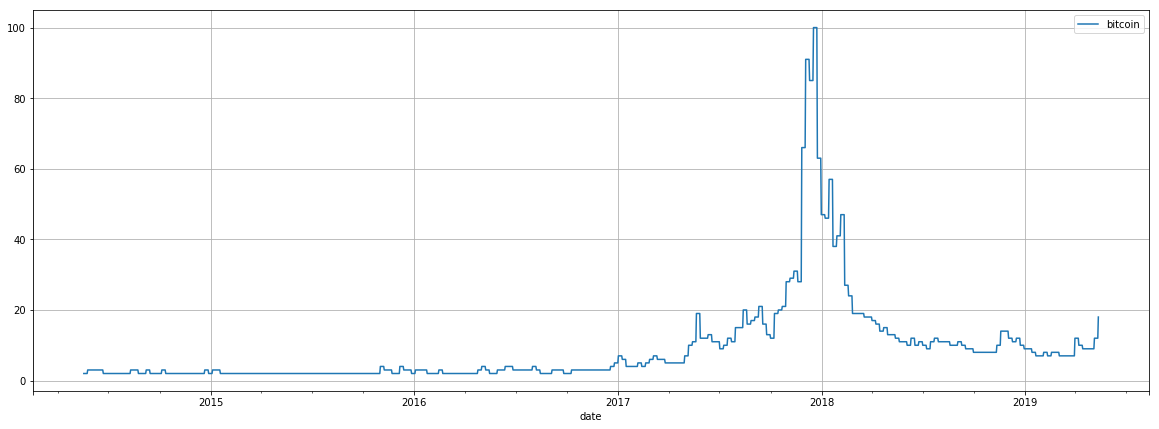

In [22]:
# Plotting data
block_data_5_years_complete_index.plot(y='bitcoin', x='date', figsize=(20,7), grid=True)